# Packages
geopy
openai
requests


In [116]:
!pip install plotly

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import plotly.express as px
from geopy.geocoders import Nominatim as Nom
import requests
from sklearn.model_selection import train_test_split

In [3]:
# Creating function that can give the info of longitude and latitude of given location using geopy
def getCoordinates(location):
    nom = Nom(user_agent="JV_Tech")
    data = nom.geocode(location)
    return data


In [4]:


#api key of openweathermap
api_key = "ae25746d86454ae3e667957b4b7c1cde"

# Taking location from user
location = input("Enter your location: ")

# Finding coordinates for the given location
details = getCoordinates(location)
lat = details.latitude
lon = details.longitude

part = 'current'

#url to fetch weatehr data
url = f"https://api.openweathermap.org/data/2.5/weather?lat={lat}&lon={lon}&appid={api_key}"
print(url)

response = requests.get(url)
data = response.json()

if data["cod"] != "404":
 
    # store the value of "main"
    # key in variable y
    y = data["main"]
 
    # store the value corresponding
    # to the "temp" key of y
    current_temperature = y["temp"]
    
    temp_celcius = round(current_temperature - 273.15,2)
    
    temp_farenheat = temp_celcius*9/5 + 32
 
    # store the value corresponding
    # to the "pressure" key of y
    current_pressure = y["pressure"]
 
    # store the value corresponding
    # to the "humidity" key of y
    current_humidity = y["humidity"]
 
    # store the value of "weather"
    # key in variable z
    z = data["weather"]
    print(z)
 
    # store the value corresponding
    # to the "description" key at
    # the 0th index of z
    weather_description = z[0]["description"]
 
    print(f"Description: {weather_description} \nTemperature: {temp_celcius}\u00b0C \nAtomspheric Pressure: {current_pressure} hPa \nHumidity: {current_humidity} % ")
    print(data)

Enter your location: gajuwaka
https://api.openweathermap.org/data/2.5/weather?lat=17.6811126&lon=83.18283163264533&appid=ae25746d86454ae3e667957b4b7c1cde
[{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}]
Description: overcast clouds 
Temperature: 29.68°C 
Atomspheric Pressure: 1007 hPa 
Humidity: 64 % 
{'coord': {'lon': 83.1828, 'lat': 17.6811}, 'weather': [{'id': 804, 'main': 'Clouds', 'description': 'overcast clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 302.83, 'feels_like': 306.15, 'temp_min': 302.83, 'temp_max': 302.83, 'pressure': 1007, 'humidity': 64, 'sea_level': 1007, 'grnd_level': 1003}, 'visibility': 10000, 'wind': {'speed': 1.08, 'deg': 299, 'gust': 1.28}, 'clouds': {'all': 98}, 'dt': 1691718919, 'sys': {'country': 'IN', 'sunrise': 1691712529, 'sunset': 1691758588}, 'timezone': 19800, 'id': 1253102, 'name': 'Visakhapatnam', 'cod': 200}


In [11]:
completion=openai.Completion.create(engine="text-davinci-003",prompt="what is the weather conditions now in hyderabad",max_tokens=1000)
print(completion.choices[0]['text'])



the current weather in Hyderabad is mostly sunny with temperatures reaching up to 32°C. It is very hot and humid.


In [6]:
city_data = getCoordinates(location)
lat= city_data.latitude
lon = city_data.longitude
url = f"https://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}"
print(url)
response = requests.get(url)
data = response.json()


https://api.openweathermap.org/data/2.5/forecast?lat=17.360589&lon=78.4740613&appid=ae25746d86454ae3e667957b4b7c1cde
{'cod': '200', 'message': 0, 'cnt': 40, 'list': [{'dt': 1691722800, 'main': {'temp': 299.34, 'feels_like': 299.34, 'temp_min': 299.12, 'temp_max': 299.34, 'pressure': 1013, 'sea_level': 1013, 'grnd_level': 954, 'humidity': 73, 'temp_kf': 0.22}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 40}, 'wind': {'speed': 3.97, 'deg': 292, 'gust': 7.35}, 'visibility': 10000, 'pop': 0.42, 'rain': {'3h': 0.33}, 'sys': {'pod': 'd'}, 'dt_txt': '2023-08-11 03:00:00'}, {'dt': 1691733600, 'main': {'temp': 300.55, 'feels_like': 302.4, 'temp_min': 300.55, 'temp_max': 302.96, 'pressure': 1012, 'sea_level': 1012, 'grnd_level': 954, 'humidity': 67, 'temp_kf': -2.41}, 'weather': [{'id': 500, 'main': 'Rain', 'description': 'light rain', 'icon': '10d'}], 'clouds': {'all': 60}, 'wind': {'speed': 4.93, 'deg': 310, 'gust': 5.22}, 'visibility

In [138]:
print(data.keys())
data['list'][0]

dict_keys(['cod', 'message', 'cnt', 'list', 'city'])


{'dt': 1691604000,
 'main': {'temp': 297.34,
  'feels_like': 298.11,
  'temp_min': 297.34,
  'temp_max': 297.78,
  'pressure': 1013,
  'sea_level': 1013,
  'grnd_level': 953,
  'humidity': 88,
  'temp_kf': -0.44},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'clouds': {'all': 75},
 'wind': {'speed': 2.41, 'deg': 305, 'gust': 3.73},
 'visibility': 10000,
 'pop': 0,
 'sys': {'pod': 'n'},
 'dt_txt': '2023-08-09 18:00:00'}

In [99]:
temperatures = []

for i in range(len(data['list'])):
    row = []
    row.append(data['list'][i]['dt_txt'])
    row.append(data['list'][i]['main']['temp_min'])
    row.append(data['list'][i]['main']['temp'])
    row.append(data['list'][i]['main']['temp_max'])
    temperatures.append(row)
columns = ['Date_Time', "Minimum Temperature","Temperature", "Maximum Temperature"]
df = pd.DataFrame(temperatures, columns=columns)


In [ ]:
temps = []
min_temps = []
max_temps = []
humidities = []
pressures = []
dates = []
for i in range(len(data['list'])):
    dates.append(data['list'][i]['dt_txt'])
    min_temps.append(data['list'][i]['main']['temp_min'] - 273.15)
    temps.append(data['list'][i]['main']['temp'] - 273.15)
    max_temps.append(data['list'][i]['main']['temp_max'] - 273.15)
    humidities.append(data['list'][i]['main']['humidity'])
    pressures.append(data['list'][i]['main']['pressure'])

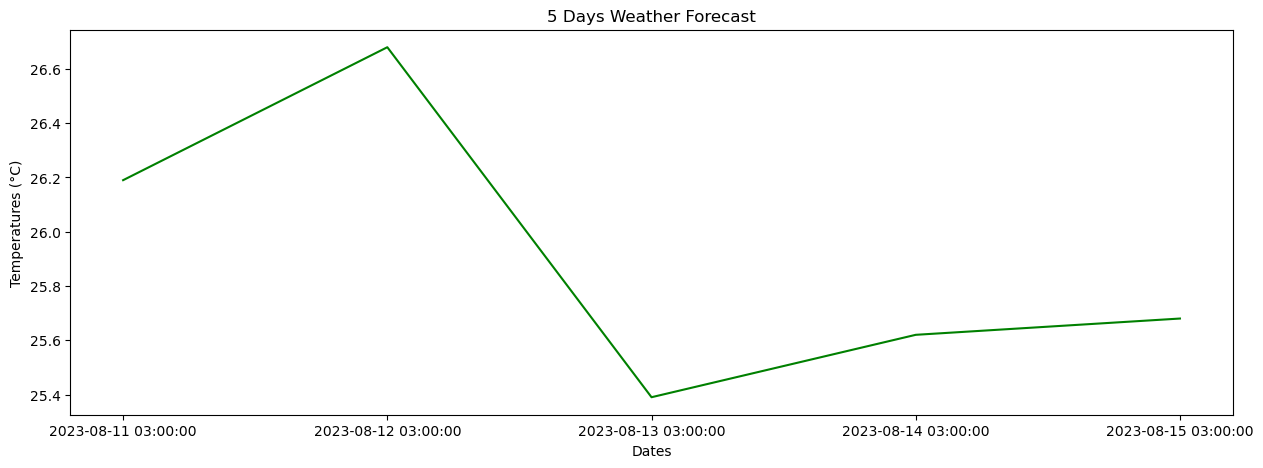

In [50]:
    
fig, ax = plt.subplots()
plt.plot(dates[::8], temps[::8], color="green")
plt.title("5 Days Weather Forecast")
plt.xlabel("Dates")
plt.ylabel("Temperatures (\u00b0C)")
plt.show()

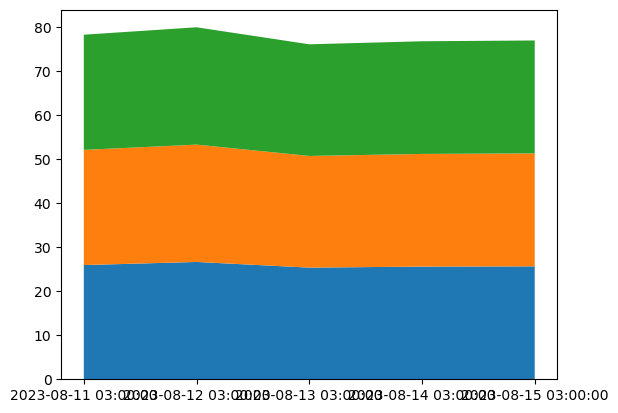

In [53]:
x_values = [1, 2, 3, 4, 5]
dataset1 = [10, 15, 25, 20, 30]
dataset2 = [5, 10, 15, 10, 5]
dataset3 = [2, 5, 8, 6, 10]
fig, ax = subplots()
ax.stackplot(dates[::8], min_temps[::8], temps[::8], max_temps[::8], labels=['Dataset 1', 'Dataset 2', 'Dataset 3'])
ax.legend(loc='upper left')
ax.xlabel('X-axis Label')
ax.ylabel('Y-axis Label')
ax.title('Stacked Area Graph')
plt.show()


In [100]:
#converting temperature from celvin to celcius

df['Minimum Temperature'] = df['Minimum Temperature'] - 273.15
df['Temperature'] = df['Temperature'] - 273.15
df['Maximum Temperature'] = df['Maximum Temperature'] - 273.15
df.columns

Index(['Date_Time', 'Minimum Temperature', 'Temperature',
       'Maximum Temperature'],
      dtype='object')

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date_Time            40 non-null     object 
 1   Minimum Temperature  40 non-null     float64
 2   Temperature          40 non-null     float64
 3   Maximum Temperature  40 non-null     float64
dtypes: float64(3), object(1)
memory usage: 1.4+ KB


In [102]:
date_times = df.pop('Date_Time')
date_times = pd.to_datetime(date_times, format="%Y-%m-%d %H:%M:%S")

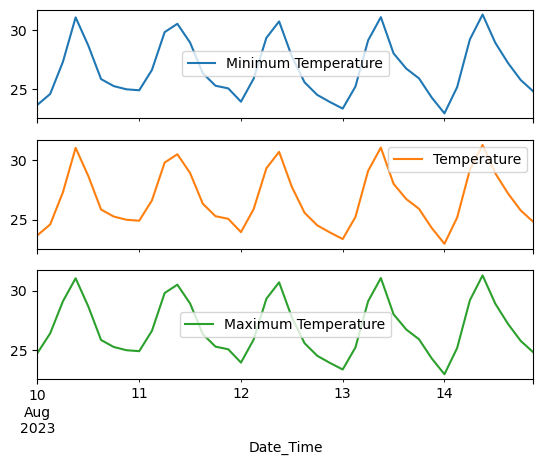

In [35]:
df.columns
plot_cols = ["Minimum Temperature", "Temperature", "Maximum Temperature"]
plot_features = df[plot_cols]
plot_features.index = date_times
chart = plot_features.plot(subplots=True)

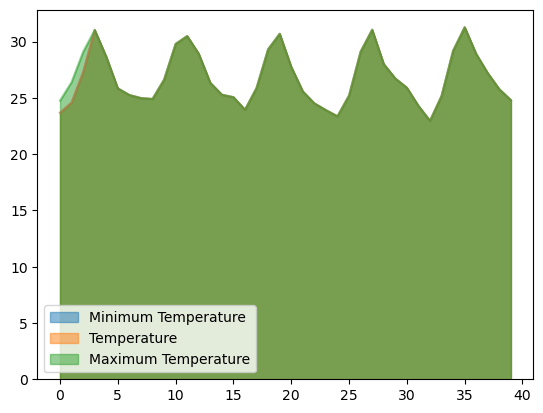

In [18]:
df.plot.area(stacked=False)
plt.show()

In [118]:
fig = px.area(df, x=date_times, y=plot_cols)
fig.show()

In [127]:
# Converting temparature units from kelvin to celcius

dataframe['Temparature'] = dataframe['Temparature'] - 273.15
dataframe['Minimum Temparature'] = dataframe['Minimum Temparature'] -273.15
dataframe['Maximum Temparature'] = dataframe['Maximum Temparature'] -273.15

# Modeling

In [220]:
print("TensorFlow Version:", tf.__version__)


TensorFlow Version: 2.12.0


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Minimum Temperature  40 non-null     float64
 1   Temperature          40 non-null     float64
 2   Maximum Temperature  40 non-null     float64
dtypes: float64(3)
memory usage: 1.1 KB


In [108]:
mae = np.mean(np.abs(predictions - y_test))
print(f"Mean Absolute Error (MAE): {mae:.4f}")

Mean Absolute Error (MAE): 3.8613


Epoch 1/100
5/5 [==============================] - 2s 9ms/step - loss: 717.9166
Epoch 2/100
5/5 [==============================] - 0s 10ms/step - loss: 708.5101
Epoch 3/100
5/5 [==============================] - 0s 8ms/step - loss: 699.3157
Epoch 4/100
5/5 [==============================] - 0s 7ms/step - loss: 689.1712
Epoch 5/100
5/5 [==============================] - 0s 8ms/step - loss: 678.6688
Epoch 6/100
5/5 [==============================] - 0s 6ms/step - loss: 665.8948
Epoch 7/100
5/5 [==============================] - 0s 8ms/step - loss: 651.1958
Epoch 8/100
5/5 [==============================] - 0s 7ms/step - loss: 633.5302
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 613.6492
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 589.2376
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 562.6718
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 531.3972
Epoch 13/100
5/5 [==================

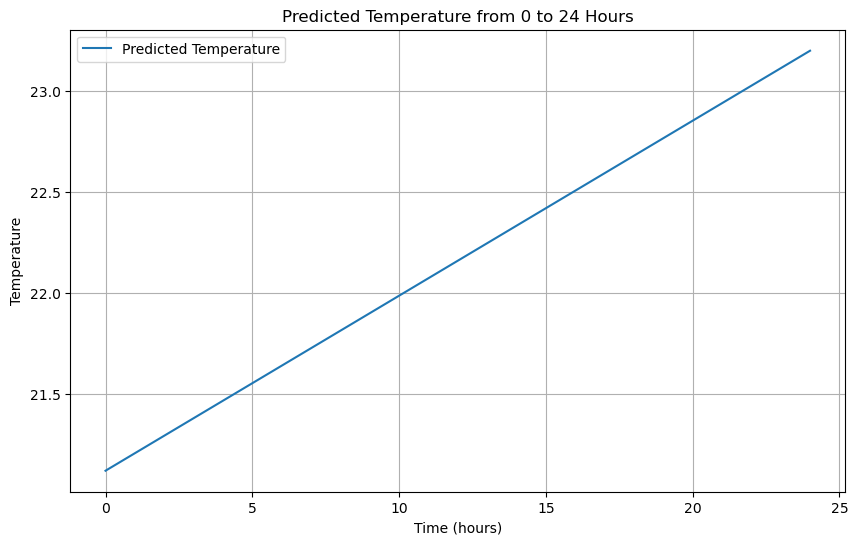

In [115]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


# Load your DataFrame
# df = ...

# Extract features and target variable

date_times = np.array([x for x in range(0,24*5,3)])
X = date_times.reshape(-1,1)
y = df['Temperature'].values

# Scale features to the range [0, 1]
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Build the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=1))
model.add(Dense(128, activation='relu'))
model.add(Dense(1))  # 1 output neuron for temperature prediction

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model on the entire dataset
model.fit(X_scaled, y, epochs=100, batch_size=8, verbose=1)

# Generate time points for 24 hours
time_points = np.linspace(0, 24, num=24)  # 24 intervals for each hour
time_points = time_points.reshape(-1, 1)

# Scale the time points
scaled_time_points = scaler.transform(time_points)

# Predict temperature values at the time points
predicted_temperatures = model.predict(scaled_time_points)

# Inverse transform the predicted temperatures to get them back to the original scale


# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time_points, predicted_temperatures, label='Predicted Temperature')
plt.xlabel('Time (hours)')
plt.ylabel('Temperature')
plt.title('Predicted Temperature from 0 to 24 Hours')
plt.grid(True)
plt.legend()
plt.show()


In [120]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Sample data
data = {
    'date_time': ['2023-08-01 00:00:00', '2023-08-01 01:00:00', '2023-08-01 02:00:00', '2023-08-01 03:00:00'],
    'temperature': [25, 26, 24, 23],
    'humidity': [60, 65, 62, 58],
    'pressure': [1010, 1012, 1008, 1011]
}

df = pd.DataFrame(data)
df['date_time'] = pd.to_datetime(df['date_time'])

# Create subplots
fig = make_subplots(rows=3, cols=1, shared_xaxes=True,
                    subplot_titles=['Temperature', 'Humidity', 'Pressure'])

# Add traces to subplots
fig.add_trace(go.Scatter(x=df['date_time'], y=df['temperature'], mode='lines', name='Temperature'), row=1, col=1)
fig.add_trace(go.Scatter(x=df['date_time'], y=df['humidity'], mode='lines', name='Humidity'), row=2, col=1)
fig.add_trace(go.Scatter(x=df['date_time'], y=df['pressure'], mode='lines', name='Pressure'), row=3, col=1)

# Update layout
fig.update_layout(title='Temperature, Humidity, and Pressure Over Time',
                  xaxis=dict(title='Date and Time'),
                  yaxis=dict(title='Value'))

# Show the plot
fig.show()


In [ ]:
import sys
import matplotlib.pyplot as plt
from PyQt5 import QtWidgets
from matplotlib.backends.backend_qt5agg import FigureCanvasQTAgg

app = QtWidgets.QApplication(sys.argv)

window = QtWidgets.QWidget()
window.setWindowTitle('PyQt5 Matplotlib Example')

figure = plt.figure()
canvas = FigureCanvasQTAgg(figure)

axes = figure.add_subplot('111')
axes.plot([1, 2, 3, 4, 5], [2, 4, 6, 8, 10])
axes.set_xlabel('X')
axes.set_ylabel('Y')

canvas.draw()

vbox = QtWidgets.QVBoxLayout()
vbox.addWidget(canvas)

window.setLayout(vbox)

window.show()

sys.exit(app.exec_())
